In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import necessary libraries**

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=30c59b243e171b3342672a8db9d8861b2336d135b194973f06e4129477261194
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.knn import KNN   # KNN model from PyOD

In [ ]:
# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/creditcard.csv')

In [ ]:
# Extracting the 'Amount' column for univariate analysis
amount_data = data[['Amount']].copy()

**Visualize the 'Amount' data distribution**

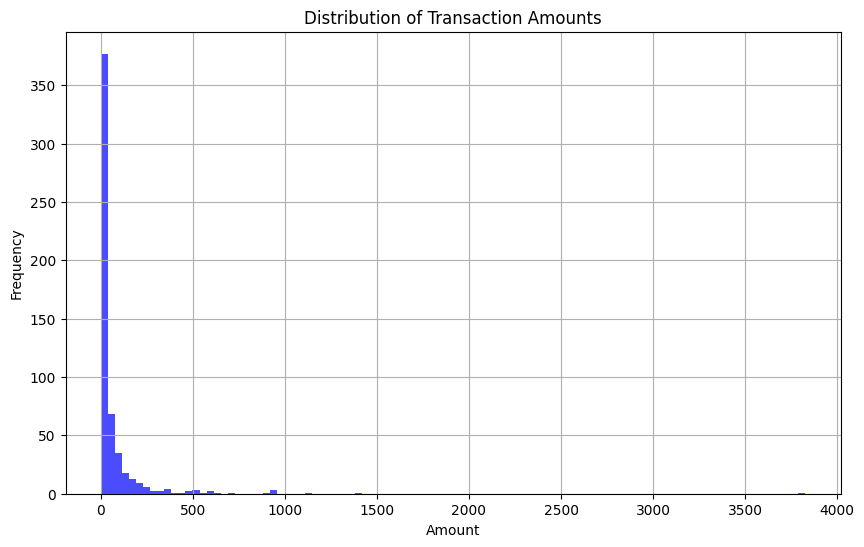

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(amount_data['Amount'], bins=100, color='blue', alpha=0.7)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Implementing KNN for anomaly detection on the 'Amount' column**

In [ ]:
clf = KNN()  # Initialize the KNN model
clf.fit(amount_data)  # Fit the model on the 'Amount' data

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
# Predicting outliers
outliers = clf.predict(amount_data)
outliers

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Visualization of anomalies detected**

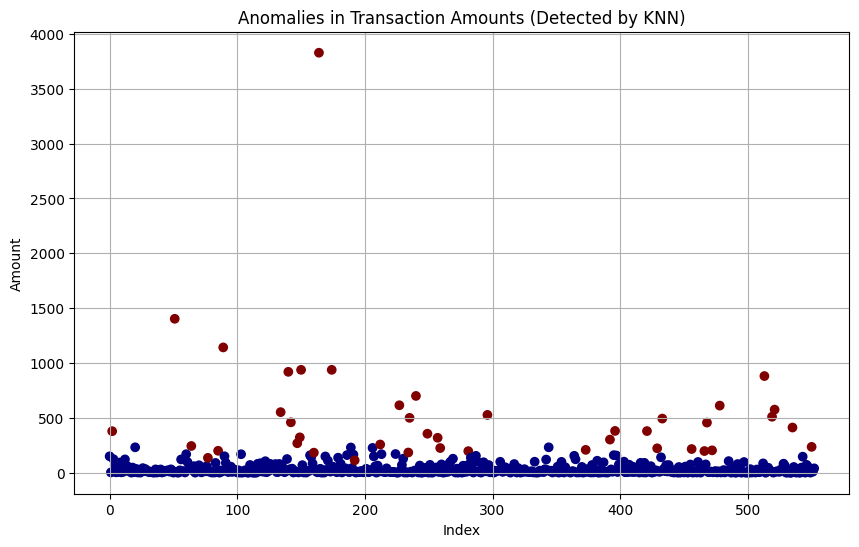

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(amount_data)), amount_data['Amount'], c=outliers, cmap='jet')
plt.title("Anomalies in Transaction Amounts (Detected by KNN)")
plt.xlabel("Index")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

**Count the number of detected anomalies**

In [ ]:
anomaly_count = sum(outliers)
print(f"Number of detected anomalies: {anomaly_count}")

Number of detected anomalies: 42
